# <center>Churn at Telco</center>

# Goal 1: Identify Potential Drivers of Churn

## Initial Hypotheses
1. Customers without Online Security option churn more than those having it
2. Customers without Online Backup option churn more than those having it
3. Customers without Device Protection option churn more than those having it
4. Customers without Tech Support option churn more than those having it

## Statistics, Visualizations, Takeaways
### Imports

In [1]:
### Imports ###
import warnings
warnings.filterwarnings("ignore")

from explore import explore_bivariate_categorical
from prepare import telco_support

In [2]:
### Pull encoded dataframe with support columns ###
df = telco_support()
df.head(3)

,churn,online_security,online_backup,device_protection,tech_support
0,0,0,1,0,1
1,0,0,0,0,0
2,1,0,0,1,0


### Run statistical tests, build visualizations ###
For each feature, 
- customers without the support option are encoded to 0
- other customers are encoded to 1

#### online_security
alpha = .05

$H_0$ Customers without Online Security option do not churn more than those having it

$H_a$ Customers without Online Security option churn more than those having it

online_security 
_____________________

         chi2        p-value  degrees of freedom
0  825.296686  1.706916e-181                   1

observed:
 churn               0     1   All
online_security                  
0                2037  1461  3498
1                3137   408  3545
All              5174  1869  7043

expected:
              0           1
0  2569.736192  928.263808
1  2604.263808  940.736192


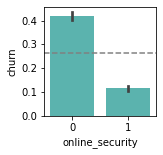


_____________________



In [3]:
explore_bivariate_categorical(df, 'churn', 'online_security')

**We reject the null hypothesis. Customers without Online Security option churn more than those having it.**

#### Online Backup
alpha = .05

$H_0$ Customers without Online Backup option do not churn more than those having it

$H_a$ Customers without Online Backup option churn more than those having it

online_backup 
_____________________

         chi2        p-value  degrees of freedom
0  504.653442  9.236013e-112                   1

observed:
 churn             0     1   All
online_backup                  
0              1855  1233  3088
1              3319   636  3955
All            5174  1869  7043

expected:
              0            1
0  2268.537839   819.462161
1  2905.462161  1049.537839


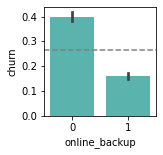


_____________________



In [4]:
explore_bivariate_categorical(df, 'churn', 'online_backup')

**We reject the null hypothesis. Customers without Online Backup option churn more than those having it.**

#### Device Protection
alpha = .05

$H_0$ Customers without Device Protection option do not churn more than those having it

$H_a$ Customers without Device Protection option churn more than those having it

device_protection 
_____________________

         chi2       p-value  degrees of freedom
0  447.817568  2.153157e-99                   1

observed:
 churn                 0     1   All
device_protection                  
0                  1884  1211  3095
1                  3290   658  3948
All                5174  1869  7043

expected:
             0           1
0  2273.68025   821.31975
1  2900.31975  1047.68025


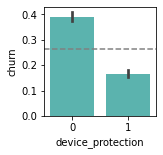


_____________________



In [5]:
explore_bivariate_categorical(df, 'churn', 'device_protection')

**We reject the null hypothesis. Customers without Device Protection option churn more than those having it.**

#### Tech Support
alpha = .05

$H_0$ Customers without Tech Support option do not churn more than those having it

$H_a$ Customers without Tech Support option churn more than those having it

tech_support 
_____________________

         chi2        p-value  degrees of freedom
0  799.672433  6.357408e-176                   1

observed:
 churn            0     1   All
tech_support                  
0             2027  1446  3473
1             3147   423  3570
All           5174  1869  7043

expected:
              0           1
0  2551.370439  921.629561
1  2622.629561  947.370439


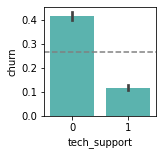


_____________________



In [6]:
explore_bivariate_categorical(df, 'churn', 'tech_support')

**We reject the null hypothesis. Customers without Tech Support option churn more than those having it.**

# Goal 2: Construct a Model to Predict Churn

### Imports

In [7]:
### Imports ###
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

from acquire import gen_telco
from prepare import gen_prep_telco
from explore import train_validate_test_split
from explore import explore_univariate, explore_bivariate, explore_multivariate

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [8]:
### Save local copies of the four telco_churn tables to current directory ###
raw_telco, t1, t2, t3 = gen_telco()
raw_telco.drop(columns='Unnamed: 0', inplace=True)

### Prepare, Split

In [9]:
### Prepare telco_churn tables ###
telco, contract_types, internet_service_types, payment_types = gen_prep_telco()
telco.head(3)

,customer_id,partner,dependents,phone_service,multiple_lines,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,...,churn,online_security,gender,senior_citizen,internet_service_type_id,contract_type_id,payment_type_id,tenure,monthly_charges,total_charges
0,0002-ORFBO,1,1,1,0,1,0,1,1,0,...,0,0,1,0,1,2,2,9,65.6,593.3
1,0003-MKNFE,0,0,1,1,0,0,0,0,1,...,0,0,0,0,1,1,2,9,59.9,542.4
2,0004-TLHLJ,0,0,1,0,0,1,0,0,0,...,1,0,0,0,2,1,1,4,73.9,280.85


In [10]:
### Split customer data ###
train, validate, test = train_validate_test_split(telco, 'churn', seed=123)
train.shape, validate.shape, test.shape

((3943, 21), (1691, 21), (1409, 21))

### Explore

In [11]:
### Identify categorical and quantified variables, identify target ###
cat_vars = ['partner', 'dependents', 'phone_service', 'multiple_lines',
            'online_security', 'online_backup', 'device_protection', 
            'tech_support', 'paperless_billing', 'streaming_tv', 
            'streaming_movies', 'gender', 'senior_citizen', 
            'internet_service_type_id', 'contract_type_id', 'payment_type_id']

quant_vars = ['tenure', 'monthly_charges', 'total_charges']

target = 'churn'

In [12]:
### Explore! ###
# explore_univariate(train, cat_vars, quant_vars)
# explore_bivariate(train, target, cat_vars, quant_vars)

From above exploration functions, I nominated the following features for further exploration:
- **partner**:
    * no/yes 
    * pop: 49/51, 
    * churn: 33% 19%
- **online_backup**: 
    * no/yes/nointernet 
    * pop: 35/43/22, 
    * churn: 40% 21% 8%
- **device_protection**: 
    * no/yes/nointernet 
    * pop: 36/43/22
    * churn: 40% 22% 8%
- **internet_service_type_id**: 
    * DSL/Fiber/None: 
    * pop: 34/44/22
    * churn: 19% 40% 7%
- **contract_type_id**: 
    * M2M/1yr/2yr 
    * pop: 55/23/22
    * churn: 42% 11% 3%

### Population Commonality

In [13]:
### In-Common Populations ###

# Goal: For a few features whose high-churning value is 
#       between 30% and 60% of total population,
#       determine if any two have too many values in common to be added to the model.

# Features to investigate: partner(Single), internet_service_type_id(Fiber), online_backup(Nobackup), 
#                          device_protection(Unprotected), contract_type_id(Month-to-month)

fs = (train[train.internet_service_type_id == 2].partner == 0).mean()
fn = (train[train.internet_service_type_id == 2].online_backup == 0).mean()
fu = (train[train.internet_service_type_id == 2].device_protection == 0).mean()
fm = (train[train.internet_service_type_id == 2].contract_type_id == 1).mean()

sn = (train[train.partner == 0].online_backup == 0).mean()
su = (train[train.partner == 0].device_protection == 0).mean()
sm = (train[train.partner == 0].contract_type_id == 1).mean()

nu = (train[train.online_backup == 0].device_protection == 0).mean()
nm = (train[train.online_backup == 0].contract_type_id == 1).mean()

mu = (train[train.contract_type_id == 1].device_protection == 0).mean()

# Print percent-in-common for each two-feature combination
print(fs, fn, fu, fm, sn, su, sm, nu, nm, mu)

0.5117478510028654 0.5547277936962751 0.5461318051575931 0.6836676217765043 0.49604743083003955 0.5004940711462451 0.6902173913043478 0.6345475910693302 0.7391304347826086 0.6064516129032258


#### Commonality:
- 40s% Share: Single-Nobackup (49.6%)
- 50s% Share: Single-Unprotected (50.1%), Fiber-Single (51.2%), Fiber-Unprotected (54.6%), Fiber-Nobackup (55.5%)
- 60s% Share: Monthly-Unprotected (60.6%), Nobackup-Unprotected (63.45%), Fiber-Monthly (68.4%), Single_Monthly (69.0%)
- 70s% Share: Nobackup-Monthly (73.9%)

### Takeaways: 
- **Although Month-to-month contracts are 55% of all contracts with a significantly-higher churn rate than other contracts, the population comparison above shows that month-to-month adds population redundancy. Therefore, I will create a model including month-to-month and a model not including month-to-month to see which model performs better.**
- **The only other population check with >60% share between variables is device_protection and online_backup. I will therefore drop one for a model, and drop the other for another model.**

### Model Design
Model Combination #1 Target and Features:
- Target: churn
- Features: partner, internet_service_type_id, online_backup

Model Combination #2 Target and Features:
- Target: churn
- Features: partner, internet_service_type_id, online_backup, contract_type_id

Model Combination #3 Target and Features:
- Target: churn
- Features: partner, internet_service_type_id, device_protection

### Modeling

In [14]:
target = 'churn'
combo1 = ['partner', 'internet_service_type_id', 'online_backup']
combo2 = ['partner', 'internet_service_type_id', 'online_backup', 'contract_type_id']
combo3 = ['partner', 'internet_service_type_id', 'device_protection']

y_train = train[target]
X_train1 = train[combo1]
X_train2 = train[combo2]
X_train3 = train[combo3]

y_validate = validate[target]
X_validate1 = validate[combo1]
X_validate2 = validate[combo2]
X_validate3 = validate[combo3]

X_train2.head(3)

,partner,internet_service_type_id,online_backup,contract_type_id
5310,1,1,1,3
3790,1,1,1,3
4398,1,2,0,2


### Models
I will use Random Forest, K-Nearest Neighbors, and Logistic Regression for each model combination listed above.

In [15]:
rf1 = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=123)
rf2 = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=123)
rf3 = RandomForestClassifier(min_samples_leaf=1, max_depth=10, random_state=123)

knn1 = KNeighborsClassifier(n_neighbors=10)
knn2 = KNeighborsClassifier(n_neighbors=10)
knn3 = KNeighborsClassifier(n_neighbors=10)

logit1 = LogisticRegression(random_state=123)
logit2 = LogisticRegression(random_state=123)
logit3 = LogisticRegression(random_state=123)

In [16]:
rf1 = rf1.fit(X_train1, y_train)
rf2 = rf2.fit(X_train2, y_train)
rf3 = rf3.fit(X_train3, y_train)

knn1 = knn1.fit(X_train1, y_train)
knn2 = knn2.fit(X_train2, y_train)
knn3 = knn3.fit(X_train3, y_train)

logit1 = logit1.fit(X_train1, y_train)
logit2 = logit2.fit(X_train2, y_train)
logit3 = logit3.fit(X_train3, y_train)

### Evaluation
Checking baseline.

In [17]:
# train.groupby('churn').churn.count()
(train.churn == 0).mean()

0.7347197565305605

Checking scores of each model against train.

In [18]:
print(rf1.score(X_train1, y_train))
print(rf2.score(X_train2, y_train))
print(rf3.score(X_train3, y_train))

print(knn1.score(X_train1, y_train))
print(knn2.score(X_train2, y_train))
print(knn3.score(X_train3, y_train))

print(logit1.score(X_train1, y_train))
print(logit2.score(X_train2, y_train))
print(logit3.score(X_train3, y_train))

0.7550088764899823
0.7702257164595485
0.7514582804970834
0.7347197565305605
0.7159523205680953
0.7347197565305605
0.7550088764899823
0.7702257164595485
0.7514582804970834


Checking model scores against validate.

In [19]:
print(rf1.score(X_validate1, y_validate))
print(rf2.score(X_validate2, y_validate))
print(rf3.score(X_validate3, y_validate))

print(knn1.score(X_validate1, y_validate))
print(knn2.score(X_validate2, y_validate))
print(knn3.score(X_validate3, y_validate))

print(logit1.score(X_validate1, y_validate))
print(logit2.score(X_validate2, y_validate))
print(logit3.score(X_validate3, y_validate))

0.7480780603193377
0.7640449438202247
0.7474866942637493
0.7344766410408042
0.7261975162625666
0.7344766410408042
0.7480780603193377
0.7640449438202247
0.7474866942637493


#### Baseline
- Not-churned customers make up 73.5% of all telco customers.

#### Train results
- rf2 and logit2 have same score, 77.0%
- rf1 and logit1 have same score, 75.5%
- rf3 and logit3 have same score, 75.1%
- knn1 and knn3 have same score, 73.5%
- knn2 scored lowest with 71.6%

#### Validate results
- rf2 and logit2 have same score, 76.4%
- rf1 and logit1 have same score, 74.8%
- rf3 and logit3 have same score, 74.7%
- knn1 and knn3 have same score, 73.4%
- knn2 scored lowest with 72.6%

### Evaluation Takeaways
- Random Forest (RF) and Logistic Regression (LOGIT) score higher than baseline, K-Nearest Neighbors scores lower
- Including the contract_type_id feature improved RF and LOGIT performance for this evaluation
- Using device_protection or online_backup produced similar score for train and test
- **Best model is rf2 and logit2, will use rf2**

### Test evaluation with best model (rf2)

In [20]:
X_test = test[combo2]
y_test = test[target]
rf2.score(X_test, y_test)

0.7714691270404542

### Predictions Output

In [21]:
csv_df = pd.DataFrame()
csv_df['CustomerID'] = test['customer_id']
csv_df['Prediction'] = rf2.predict(X_test)
csv_df = csv_df.reset_index().drop(columns='index')

proba_df = pd.DataFrame(rf2.predict_proba(X_test))

output_df = pd.concat([csv_df, proba_df], axis=1)
output_df.head()

,CustomerID,Prediction,0,1
0,4531-AUZNK,0,0.813652,0.186348
1,2296-DKZFP,0,0.983474,0.016526
2,9692-TUSXH,1,0.386903,0.613097
3,5129-JLPIS,1,0.386903,0.613097
4,1273-MTETI,1,0.386903,0.613097


In [22]:
output_df.to_csv('predictions.csv')